# Assignment 10

In [1]:
import numpy as np
np.set_printoptions(threshold=10) # printing setup
import matplotlib.pyplot as plt

In [2]:
# This formula shall be imitated by the neural network
def formula_1(x):
    return x + 0.75

# This formula shall be imitated by the neural network, too
def formula_2(x):
    return(np.sin(x) + 0.5)

In [3]:
# Input data
X = np.random.uniform(low=-0.5, high=1.55, size=100)# make 100 uniformly distributed samples
X = X.reshape(-1, 1) # -1 indicates "as many rows as required"
X # input data as column vector

array([[-0.37926129],
       [ 0.71290082],
       [ 0.2608828 ],
       ...,
       [ 0.21500309],
       [ 0.92159135],
       [-0.0091413 ]])

In [4]:
# Target values with formula_1
y_1 = np.array([formula_1(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_1 = y_1.reshape(-1, 1)
y_1 # target data as column vector

array([[0.37073871],
       [1.46290082],
       [1.0108828 ],
       ...,
       [0.96500309],
       [1.67159135],
       [0.7408587 ]])

In [5]:
# Target values with formula_2
y_2 = np.array([formula_2(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_2 = y_2.reshape(-1, 1)
y_2 # target data as column vector

array([[0.12976564],
       [1.1540309 ],
       [0.75793358],
       ...,
       [0.71335045],
       [1.29656468],
       [0.49085883]])

### Code below contains the parts to be edited

Imitation of formula 'x+0.75'
Weight_1:2.2640104282619675
Weight_2:3.738781731470381
Bias:1.0


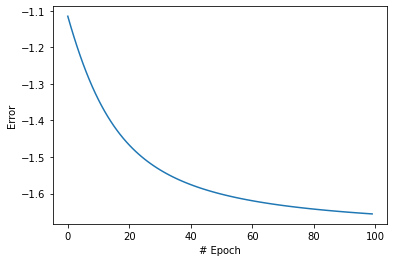

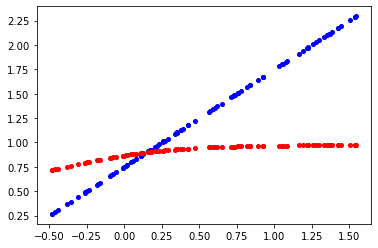


Imitation of formula 'sin(x)+0.5'
Weight_1:2.0150953804483045
Weight_2:2.560418733495837
Bias:1.0


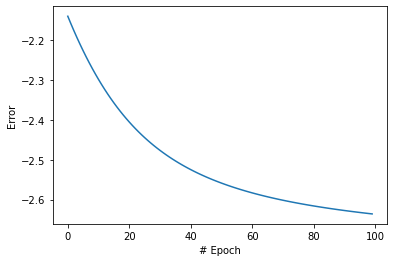

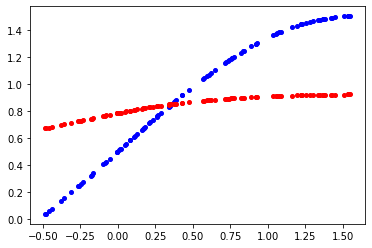

In [28]:
# Simple neural-network based regressor
class NeuralNetwork:
    
    # Function called at object initialization
    def __init__(self):
        
        # These are members of the class. You can access them in every method by "self.var_name" and from outside the class with "instance_name.var_name"
        
        # Sample to compute pass with
        self.X          = 0.0 # set me!
        self.y          = 0.0 # set me!
        
        # Parameters to be learned
        self.weight_1   = 1.0 # teach me!
        self.weight_2   = 1.0 # teach me!
        self.bias       = 1.0 # teach me!
        
        # State information
        self.hidden     = 0.0 # use me!
        self.output     = 0.0 # use me!
        self.error      = 0.0 # use me!
        
    # Set sample to be used in feed-forward and back-propagation pass
    def set_sample(self, X, y):
        self.X = float(X)
        self.y = float(y)
        
    # (a) Feed-forward pass
    def feed_forward(self):
        
        # TODO: Feed-forward pass and error estimation, store results in state information members
        # Consider the loss function: 0.5 ∗ (𝑡𝑎𝑟𝑔𝑒𝑡 − 𝑜𝑢𝑡𝑝𝑢𝑡)2

        a1 = self.X * self.weight_1  #Input to the hidden layer
        z1 = 1/(1+np.exp(-a1))       # Sigmoid activation function
        
        a2 = z1 * self.weight_2    # Input to the second layer 
        z2 = 1/(1+np.exp(-a2))     # Sigmoid activation function
        
        error = 0.5 * (self.y - z2)**2

        #Storing the variables
        self.hidden = z1
        self.output = z2        
        self.error = self.error + error
        
              
    # (b) Back-propagation pass
    def back_prop(self):
        
        # TODO: Derivations of parameters
        # TODO: Update the parameters with learning rate of 0.01
        
        alpha = 0.01 # learning rate
        
        error = self.output - self.y #z2 - self.y
        dz2 = self.output*(1-self.output)   #z2*(1-z2)
        dw2 = self.hidden  #z1
        
        #self.weight_2 = self.weight_2 - alpha* (dw2 * dz2 * error)
        
        dz1 = self.hidden*(1-self.hidden) # z1*(1-z1)
        dw1 = self.X
        
        self.weight_1 = self.weight_1 - alpha * (error*dz2*self.weight_2*dz1*dw1)
        self.weight_2 = self.weight_2 - alpha* (dw2 * dz2 * error)
        
        
def execute_nn(X, y):
    
    # Instantiate neural network
    nn = NeuralNetwork()
    
    # Collect mean error of each epoch to plot it later
    epoch_error = []

    # Perform multiple epochs, aka inputting the dataset multiple times
    for epoch in range(0,100):
       
        # Perfoming SGD algorithm
        nn.error = 0 # making it 0 in the beginning of the epoch
        
        for index in range(len(X)):

            nn.set_sample(X[index],y[index])    # setting the sample
            nn.feed_forward()                   # perform feed-forward to calculate output
            nn.back_prop()                      # perform back-propagation to update weights 
        epoch_error.append(nn.error/len(X))     # storing the mean of error for each epoch
        
    # Print final parameters of trained neural network
    print("Weight_1:"+ str(nn.weight_1))
    print("Weight_2:" + str(nn.weight_2))
    print("Bias:" + str(nn.bias))
    
    # Plot epoch errors with logarithmic transformation
    plt.plot(list(range(len(epoch_error))), np.log(epoch_error))
    ax = plt.gca()
    ax.set_xlabel('# Epoch')
    ax.set_ylabel('Error')
    plt.show()
    
    # Plot datapoints as originally transformed and as transformed by neural network
    computed = []
    for i in range(0, X.shape[0]):
        nn.set_sample(X[i], y[i])
        nn.feed_forward()
        computed.append(nn.output)   # nn.output is the output of neural network
    plt.scatter(X.transpose().flatten(), y.transpose().flatten(), c='blue', s=16)
    plt.scatter(X.transpose().flatten(), computed, c='red', s=16)
    plt.show()

print("Imitation of formula 'x+0.75'")
execute_nn(X,y_1)
print()
print("Imitation of formula 'sin(x)+0.5'")
execute_nn(X,y_2)
